# #11.1 (Date and Time Data Types and Tools)

In [32]:
pip install pytz

Note: you may need to restart the kernel to use updated packages.


In [9]:
from datetime import datetime

now = datetime.now()
print(now.month, now.year) 

9 2021


In [13]:
# Realizando operações entre datas
delta = datetime(2011, 9, 11) - datetime(2009, 5, 1, 14, 24)
delta

# As informações de time delta sempre são mostradas em (dias, segundos)

datetime.timedelta(days=862, seconds=34560)

In [19]:
from datetime import timedelta
delta = timedelta(12)

# Que dia será somando a data abaixo com 12 dias vezes 2?
datetime(2001, 9, 11) + delta*2

datetime.datetime(2001, 10, 5, 0, 0)

* Converting Between String and Datetime

In [28]:
# Vamos converter um datetime a uma string formatada
stamp = datetime(2011, 3, 4, 8, 21, 45)

# Escrevendo a data de stamp de duas maneiras
print(stamp.strftime('%y-%m-%d')) 
print(stamp.strftime('%Y/%m/%d'))

# Escrevendo o horário de stamp da maneira usual
print(stamp.strftime('%H:%M:%S')) 

11-03-04
2011/03/04
08:21:45


In [45]:
# Fazendo o processo contrário:
string_data = '2021-01-01'

datetime.strptime(string_data, '%Y-%m-%d') # A separação deve estar em '-' aparentemente

lista_datas = ['7/6/2021', '05/03/2021']
[datetime.strptime(x, '%d/%m/%Y') for x in lista_datas] # A dos elementos temperais da string deve estar de acordo
                                                            # com os da formatação

[datetime.datetime(2021, 6, 7, 0, 0), datetime.datetime(2021, 3, 5, 0, 0)]

In [61]:
# Podemos utilizar uma maneira mais automatizada de tradução de strings em datetimes
from dateutil.parser import parse
print(parse('2001/03/01'))

# Por definição, parse considera o primeiro elemento da data como o mês
print(parse('12/01/2021')) 

# Podemos arrumar isso com dayfirst
print(parse('12/01/21', dayfirst=True)) 
parse('12/01/21')

# Outro método: yearfirst
print(parse('12/01/11',yearfirst=True))

2001-03-01 00:00:00
2021-12-01 00:00:00
2021-01-12 00:00:00
2012-01-11 00:00:00


# Vamos complementar o conteúdo do livro com o Corey Schafer

In [14]:
import datetime

birthday = datetime.date(2001,10,24)
print(birthday)

aujourdhui = datetime.date.today()
print(aujourdhui) 
print(aujourdhui.weekday()) # Domingo = 0
print(aujourdhui.isoweekday()) # Domingo = 1

2001-10-24
2021-09-29
2
3


In [30]:
# Se quiséssemos saber: daqui a 7 dias, qual será a data?
# Os timedeltas são utilizados para se fazer operações matemáticas entre datas

delta = datetime.timedelta(days=7)
aujourdhui = datetime.date.today()
aniversario = datetime.date(2021, 10, 24)

print(aujourdhui + delta)
print( aujourdhui - delta)

# Quantos dias faltam para o meu aniversário (hoje: 29/09/2021)?
print(f' Restam {(aniversario - aujourdhui).days} dias para o meu aniversário!')

# Podemos descobrir também a quantidade de segundos restantes para o meu aniversário!
print(f' Restam {(aniversario - aujourdhui).total_seconds()} segundos para o meu aniversário!')

2021-10-06
2021-09-22
 Restam 25 dias para o meu aniversário!
 Restam 2160000.0 segundos para o meu aniversário!


In [41]:
# Trabalhando exclusivamente com horário

verstappen_starts = datetime.time(9,30,0)
verstappen_finishes = datetime.time(9,31,15)
print(verstappen_finishes)

09:31:15


In [1]:
# Trabalhando com informações de data e horário
import datetime
birthday = datetime.datetime(2001,10,24,6,30,25)
birthday.time().hour
birthday.weekday()


2

In [17]:
import pytz

# Este comando disponibiliza todas as timezones disponíveis
print(pytz.all_timezones)

# Não nos deixa especificar a timezone
today = datetime.datetime.today() 

# Nos deixa especificar a timezone
# Para especificar a timezone, utilizar tz
tz = pytz.timezone('Brazil/West')
now = datetime.datetime.now(tz = tz)
print(now)

#uctnow = datetime.datetime.utcnow()
#utcnow

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [38]:
# Utilizando datetime e pytz para fazer uma questão FUVEST de 2013

# Em tz ou tzinfo, sempre utilizar um objeto pytz.timezone()
# PRC -> Abreviação para Popular Republic of China
tz = pytz.timezone('PRC')
joao = datetime.datetime(2021,9,21, 9, 0, 0, tzinfo = tz)
print(joao)

# astimezone -> converte as timezones d eum horário
maria = joao.astimezone(pytz.timezone('Brazil/West'))
maria

# Gabarito: A (Domingo, 21h)

2021-09-21 09:00:00+08:06


datetime.datetime(2021, 9, 20, 20, 54, tzinfo=<DstTzInfo 'Brazil/West' -04-1 day, 20:00:00 STD>)

In [42]:
# O problema com o datetime.datetime.now()
# Por padrão, a variável datetime.datetime.now() possui como timezone uma naive time
# Com isso, não podemos convertê-la para um outro fuso horário a não ser que utilizemos o método tz

a = datetime.datetime.now(tz=tz)
b = a.astimezone(pytz.timezone('Brazil/East'))
b

datetime.datetime(2021, 10, 1, 13, 38, 3, 147284, tzinfo=<DstTzInfo 'Brazil/East' -03-1 day, 21:00:00 STD>)

In [62]:
# Agora vamos aprender a formatar as nossas datas!
dia_hoje = datetime.datetime.now().date()

# %A: Dia da Semana por extenso
# %B: Mês por extenso
# %d: Dia com dois algarismos
# %Y: Ano com quatro dígitos
print(dia_hoje.strftime('%A: %B %d, %Y'))
print(dia_hoje.strftime('%a: %b %d, %Y' ))
print(dia_hoje.strftime('%c'))

# Escrevendo nos padrões escolares
print(dia_hoje.strftime('São Paulo, Dia %d de %B de %Y'))

Friday: October 01, 2021
Fri: Oct 01, 2021
Fri Oct  1 00:00:00 2021
São Paulo, Dia 01 de October de 2021


In [74]:
# Agora, faremos o processo contrário, convertendo uma string em um datetime
birthday = 'October 24th 2001'

# Vamos dar a variável a ser convertida e o formato de data que ela possui
# ATENÇÃO: o strptime é sempre precedido por datetime.datetime, o que não ocorre com strftime
datetime.datetime.strptime(birthday,'%B %dth %Y')

datetime.datetime(2001, 10, 24, 0, 0)

In [18]:
import datetime
def clock():
    while True:
        print(datetime.datetime.now().time().strftime('%H:%M:%S'), end='\r')
        
clock()

08:47:30

KeyboardInterrupt: 

In [11]:
import time
for i in range(3600, -1, -1):
    minute = 3600/60
    
    time.sleep(1)
    print(i, end='\r')

KeyboardInterrupt: 

In [16]:
import datetime
import pytz
hora = '12:30:31'
timezone = pytz.timezone('Brazil/DeNoronha')
#horario = '03:
now = datetime.datetime.now(tz = timezone).time()
now.strftime('%H:%M:%S')

datetime.datetime.strptime(hora, '%H:%M:%S').time()

datetime.time(12, 30, 31)

In [34]:
f = lambda: [x for x in range(500)]

inicio = datetime.datetime.now()
f()
fim = datetime.datetime.now()

print(fim-inicio)


0:00:00.000149


In [41]:
def funcao(x):
    return [x for x in range(500)]

inicio = datetime.datetime.now()
funcao(5)
fim = datetime.datetime.now()
print((fim-inicio).microsecond)

AttributeError: 'datetime.timedelta' object has no attribute 'microsecond'

# #11.2 (Time Series Basics)

In [52]:
# Agora, vamos trabalhar com datetimes pelo pandas
# Para nos auxiliar nesse aprendizado, vamos utilizar o histórico das ações da Pfizer
# Vamos, rapidamente, pegá-lo da nossa pasta Downloads
from pathlib import Path
import shutil
current = Path.cwd()
downloads = current.parents[3] / 'Downloads'

for file in downloads.iterdir():
    if file.name == 'PFE.csv':
        shutil.move(str(file), str(current)) 


In [158]:
# Com ele em mãos, vamos abrí-lo com o pandas
import datetime
import pandas as pd
import numpy as np
pfizer = pd.read_csv('PFE.csv', sep=',', index_col=0)
# O Df criado possui um index com as datas dos registros das ações
# Vamos converter o index para o tipo Datetime
pfizer.index = pd.to_datetime(pfizer.index)
pfizer.index

DatetimeIndex(['1972-06-01', '1972-06-02', '1972-06-05', '1972-06-06',
               '1972-06-07', '1972-06-08', '1972-06-09', '1972-06-12',
               '1972-06-13', '1972-06-14',
               ...
               '2021-09-20', '2021-09-21', '2021-09-22', '2021-09-23',
               '2021-09-24', '2021-09-27', '2021-09-28', '2021-09-29',
               '2021-09-30', '2021-10-01'],
              dtype='datetime64[ns]', name='Date', length=12443, freq=None)

In [78]:
# Explorando as utilizades de dados do tipo Datetime
# Como estavam as ações da Pfizer no dia em que eu nasci?

# Podemos separar os elementos das datas seja com /, seja com -, seja com .
pfizer.loc['24/10/2001']
pfizer.loc['24-10-2001']
pfizer.loc['24.10.2001']

Open         4.039848e+01
High         4.103416e+01
Low          4.022770e+01
Close        4.075901e+01
Adj Close    1.977701e+01
Volume       1.328504e+07
Name: 2001-10-24 00:00:00, dtype: float64

<AxesSubplot:title={'center':'Pfizer Adj Close'}, xlabel='Date'>

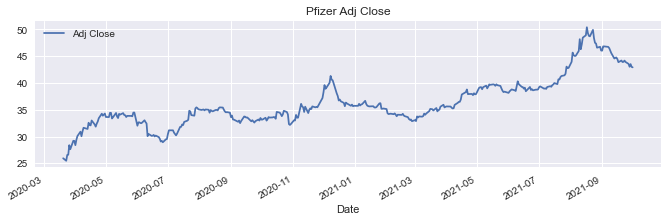

In [134]:
# Podemos fazer buscas mais seleticas para data
# Podemos pegar os preços da Pfizer apenas no ano de 2001
pfizer.loc['2001']

# Podemos também pegar dados a partir de uma determinada data
# Em 20 de março de 2020, Andrew Cuomo anunciou o mandato de 'Stay at Home' para todo o estado de NY (COVID-19)

# Como as ações da Pfizer se comportaram desde aquela data?
pfizer_after_lock = pfizer.loc['2020/3/20':,'Adj Close']

# Importando a matplotlib apenas para utilizar os seus styles
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# Vamos transformar esse fatiamento em um gráfico de linha
pfizer_after_lock.plot(figsize=(10,3), title='Pfizer Adj Close', label='Adj Close', legend='upper left')

In [132]:
# Utilizando truncate
# Faz um recorte em nosso DF (outra maneira de se fazer além do loc)
pfizer_20_21 = pfizer.loc['2020/1/1':,]
pfizer_20_21.truncate(after='2021/1/1')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,37.286530,37.333965,36.888046,37.134724,34.635296,16514072
2020-01-03,36.736244,37.229603,36.688805,36.935486,34.449467,14922848
2020-01-06,36.831120,37.001900,36.717270,36.888046,34.405216,15771951
2020-01-07,37.115749,37.125237,36.698292,36.764706,34.290184,20108107
2020-01-08,36.774193,37.210625,36.764706,37.058823,34.564507,16403507
...,...,...,...,...,...,...
2020-12-24,37.400002,37.570000,37.180000,37.270000,36.181473,14790100
2020-12-28,37.360001,37.580002,36.680000,36.820000,35.744614,26993700
2020-12-29,36.900002,37.200001,36.790001,37.049999,35.967896,23152100


In [182]:
# A biblioteca pandas pode criar, também, sequências do tipo date
# Elas serão do tipo DatetimeIndex
pd.date_range('1/1/2001', periods=365)

# As datas disponibilizadas pelo comando são igualmente espaçadas entre si
# Um date_range de datas igualmente separadas de três em três meses com o fuso horário da China
months = pd.date_range(start= '1/1/2001',periods=4, freq='3M', tz='PRC')
display(months)

# Vamos criar um DataFrame qualquer com pd.date_range

dias_2021 = pd.DataFrame(np.arange(1, 366), index= pd.date_range('1/1/2021', periods=365), columns=['Número Dia'])
#display(dias_2021)

DatetimeIndex(['2001-01-31 00:00:00+08:00', '2001-04-30 00:00:00+08:00',
               '2001-07-31 00:00:00+08:00', '2001-10-31 00:00:00+08:00'],
              dtype='datetime64[ns, PRC]', freq='3M')

* Time Series with Duplicate Indices

In [19]:
# Podemos nos encontrar em situação nas quais possuímos DF's com datas repetidas
loja = pd.read_csv('loja.csv', index_col=0, skipinitialspace=True)

# O to_datetime possibilita nós especificarmos a maneira como a data está representada no DF
# A função utilizará o strftime para a conversão da string em datetime
loja.index = pd.to_datetime(loja.index, format= '%Y-%m-%d')

# Comprovando a existência de datas repetidas
#print(loja.index.is_unique)


# Para abreviarmos/corrigirmos os dados, podemos utilizar o groupby
# Supondo que houve um erro na compilação das receitas nos dias 3 e 7, podemos aplicar a função sum 
display(loja.groupby(loja.index)['Receita'].agg([('Receitas Corrigidas', sum)]))


,Receitas Corrigidas
Data,
2021-01-01,100
2021-01-02,150
2021-01-03,170
2021-01-04,180
2021-01-05,100
2021-01-06,100
2021-01-07,175


# #11.3 ( Date Ranges, Frequencies, and Shifting)

* Generating Date Ranges

In [42]:
# O livro agora explicará sobre os date_range's já mencionados acima

# Note que o range possui intervalo aberto tanto na esquerda quanto na direita
vida = pd.date_range(start = '2001/10/24', end = '24/10/2021' )

# Ao invés de escrever a data end, podemos especificar a quantidade de datas a serem expostas
trinta_dias = pd.date_range(start=datetime.datetime.now().date(), periods=30)

# Podemos, também, definir o range apenas com o parâmtro end
trinta_dias_tras = pd.date_range(end = datetime.datetime.now().date(), periods = 30)

# Podemos também definir a frequência em que as datas serão apresentadas
# 'MS' -> Month Start
mes_a_mes = pd.date_range(start='2021/01/01', periods = 12, freq='MS')

# Algumas vezes, receberemos datas que possuem, de maneira indesejável, o horário
# Nesse contexto, normalize padronizará os horário à meia-noite de cada data
hoje_completo = datetime.datetime.now()
sem_horario = pd.date_range(start=hoje_completo, periods = 7, normalize = True)
display(sem_horario)

DatetimeIndex(['2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-09', '2021-10-10', '2021-10-11', '2021-10-12',
               '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-16',
               '2021-10-17', '2021-10-18', '2021-10-19', '2021-10-20',
               '2021-10-21', '2021-10-22', '2021-10-23', '2021-10-24',
               '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28',
               '2021-10-29', '2021-10-30', '2021-10-31', '2021-11-01',
               '2021-11-02', '2021-11-03'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-09', '2021-10-10', '2021-10-11'],
              dtype='datetime64[ns]', freq='D')

In [59]:
from pandas.tseries.offsets import Hour, Minute
# Podemos definir as frequências de um date_range de maneira diferente
uma_meia = pd.date_range(start = '2001/10/24', periods = 8, freq = '1h30min')


# Ademais podemos ser mais específicos com as datas que desejamos inserir
# Da data de hoje, vamos selecionar todas as terceiras quartas dos meses restantes até o fim do ano
terceira_quarta = pd.date_range(start = datetime.datetime.now().date(), end = '31/12/2021', \
                    freq = 'WOM-3WED')

# Note: o Pandas reconhece as datas corretamente mesmo quando escritas de maneiras distintas
segunda_segunda = pd.date_range(start = '2021/01/01', end = '31/12/2021', freq = 'WOM-2MON')
display(segunda_segunda)

DatetimeIndex(['2021-01-11', '2021-02-08', '2021-03-08', '2021-04-12',
               '2021-05-10', '2021-06-14', '2021-07-12', '2021-08-09',
               '2021-09-13', '2021-10-11', '2021-11-08', '2021-12-13'],
              dtype='datetime64[ns]', freq='WOM-2MON')

* Shifting (Leading and Lagging) Data

In [25]:
# o comando shift do pandas permite com que nós 'empurremos' os dados de nosso DataFrame

loja = pd.read_csv('loja.csv', index_col=0)
loja.index= pd.to_datetime(loja.index)

# Empurrando para baixo
loja.shift(2)

# Empurrando para cima
loja.shift(-2)

# Boa utilidade: podemos utilizar o shift para calcularmos a variação percentual de dados do DF
display(loja.shift(1))
# Estamos dividindo a receita de um determinado index de loja pela receita de seu respectivo index em loja.shift(1)
(loja / loja.shift(1)) - 1

,Receita
Data,
2021-01-01,NaN
2021-01-02,100.0
2021-01-03,150.0
2021-01-03,20.0
2021-01-03,80.0
2021-01-04,70.0
2021-01-05,180.0
2021-01-06,100.0
2021-01-07,100.0


,Receita
Data,
2021-01-01,NaN
2021-01-02,0.500000
2021-01-03,-0.866667
2021-01-03,3.000000
2021-01-03,-0.125000
2021-01-04,1.571429
2021-01-05,-0.444444
2021-01-06,0.000000
2021-01-07,0.100000


In [33]:
# Aperfeiçoando o nosso shift
# Como nosso index está como um datetime, podemos pedir para shift acrescentar novas datas assim que ele empurra
                                                                                # os dados para baixo
# Note que ao invés de descartar certos dados, novos indexes são criados
loja.shift(-2, freq='D')

,Receita
Data,
2020-12-30,100
2020-12-31,150
2021-01-01,20
2021-01-01,80
2021-01-01,70
2021-01-02,180
2021-01-03,100
2021-01-04,100
2021-01-05,110


* Shifting dates with offsets

In [43]:
# Operações com datas também podem ser realizadas com os offsets do pandas!
from pandas.tseries.offsets import Day, MonthEnd

hoje = datetime.datetime.now().date()

# A data daqui a 7 dias será:
hoje + 7*Day()

# Para offsets sem uma frequência de tempo específica, seu output será a data que corresponde a seus parâmetros
# mais próxima da data atual

# O fim do mês atual será:
hoje + MonthEnd()

Timestamp('2021-10-31 00:00:00')

In [74]:
# Uma maneira mais sofisticada de se fazer essas operações seria com rollforward e rollback
hoje = datetime.datetime.now().date()
offset = MonthEnd()

# Comando inválido: o self não pode ser um objeto datetime
#hoje.rollforward(offset)

# Comando válido: o offset deve ser o self do métod
offset.rollforward(hoje)

offset.rollback(hoje)

Timestamp('2021-09-30 00:00:00')

In [53]:
# Uma maneira criativa de se utilizar esses comandos
# Vamos fazer uma lista com todos os últimos dias dos meses neste ano
inicio_ano = datetime.date(2021, 1, 1)
offset = MonthEnd()

# List Comprehension: a cada iteração, o valor i é acrescido por 1, fazendo com que alcancemos os
# últimos dias dos meses 
l = [inicio_ano + i*offset for i in range(1,13)]

[Timestamp('2021-01-31 00:00:00'),
 Timestamp('2021-02-28 00:00:00'),
 Timestamp('2021-03-31 00:00:00'),
 Timestamp('2021-04-30 00:00:00'),
 Timestamp('2021-05-31 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-07-31 00:00:00'),
 Timestamp('2021-08-31 00:00:00'),
 Timestamp('2021-09-30 00:00:00'),
 Timestamp('2021-10-31 00:00:00'),
 Timestamp('2021-11-30 00:00:00'),
 Timestamp('2021-12-31 00:00:00')]

In [4]:
# Outra maneira criativa de se utilizar o rollforward:
# Vamos pegar o valor médio das ações da Pfizer em todos os anos do arquivo em csv
from pandas.tseries.offsets import YearEnd

pfizer = pd.read_csv('PFE.csv', index_col=0)

pfizer.index = pd.to_datetime(pfizer.index)

offset = YearEnd()

media = pfizer.groupby(offset.rollforward).mean()

# Apenas por uma questão estética, vamos deixar, no index, apenas o ano das ações
media.index = media.index.strftime('%Y')
media


,Open,High,Low,Close,Adj Close,Volume
1972,0.838988,0.852458,0.836398,0.844758,0.191087,2.242023e+06
1973,0.867359,0.876576,0.857947,0.867320,0.198733,2.126711e+06
1974,0.656066,0.668000,0.645656,0.655383,0.152932,1.607986e+06
1975,0.591280,0.600743,0.581582,0.590547,0.141454,2.583991e+06
1976,0.557959,0.565332,0.550918,0.558076,0.137806,3.419159e+06
1977,0.528161,0.533377,0.523043,0.528190,0.134898,2.576879e+06
1978,0.627089,0.634452,0.619883,0.627834,0.166797,4.124874e+06
1979,0.658771,0.664856,0.652590,0.659211,0.181966,4.456515e+06
1980,0.819965,0.829741,0.811840,0.821069,0.235136,5.203497e+06
1981,0.972810,0.981970,0.964089,0.972625,0.287850,6.176503e+06


In [5]:
# A ser aprofundado em breve: uma outra maneira de se calcular essa média (resample)

media = pfizer.resample('Y').mean()

# Mesmo procedimento estético que na parte de cima
media.index = media.index.strftime('%Y')
display(media)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972,0.838988,0.852458,0.836398,0.844758,0.191087,2.242023e+06
1973,0.867359,0.876576,0.857947,0.867320,0.198733,2.126711e+06
1974,0.656066,0.668000,0.645656,0.655383,0.152932,1.607986e+06
1975,0.591280,0.600743,0.581582,0.590547,0.141454,2.583991e+06
1976,0.557959,0.565332,0.550918,0.558076,0.137806,3.419159e+06
1977,0.528161,0.533377,0.523043,0.528190,0.134898,2.576879e+06
1978,0.627089,0.634452,0.619883,0.627834,0.166797,4.124874e+06
1979,0.658771,0.664856,0.652590,0.659211,0.181966,4.456515e+06
1980,0.819965,0.829741,0.811840,0.821069,0.235136,5.203497e+06


# #11.4 (Time Zone Handling)

In [1]:
import pytz
import pandas as pd
import numpy as np
# Evidenciando as timezones disponíveis
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

* Time Zone Localizationand Conversion

In [13]:
# As timezones de um date_range são, por padrão naive

i = pd.date_range(start = '06/03/2021', periods=14, freq = 'D')
l = [i for i in range(14)]
df = pd.DataFrame(l, index = i, columns = ['Números'])

print(df.index.tz)

# No entanto, nós podemos especificar a timezone de um date_range
i_novo = pd.date_range(start = '06/03/2021', periods = 14, freq = 'D', tz = pytz.timezone('PRC'))
l = [i for i in range(14)]
df_novo = pd.DataFrame(l, index = i_novo, columns = ['Números'])

# Como é de se observar, o index do DF agora demonstra o fuso-horário das datas
df_novo


None


,Números
2021-06-03 00:00:00+08:00,0
2021-06-04 00:00:00+08:00,1
2021-06-05 00:00:00+08:00,2
2021-06-06 00:00:00+08:00,3
2021-06-07 00:00:00+08:00,4
2021-06-08 00:00:00+08:00,5
2021-06-09 00:00:00+08:00,6
2021-06-10 00:00:00+08:00,7
2021-06-11 00:00:00+08:00,8
2021-06-12 00:00:00+08:00,9


In [2]:
# Podemos também especificar a timezone de datas do tipo naive manualmente
date = pd.date_range(start = '24/10/2001', periods = 30, freq = 'D')
l = [i for i in range(30)]
naive = pd.DataFrame(l, index = date, columns = ['Números'])
print(naive.index.tz)

# Vamos inserir a timezone 'Brazil/East' em nosso index

non_naive = naive.tz_localize(pytz.timezone('Brazil/East'))

display(non_naive)

None


,Números
2001-10-24 00:00:00-02:00,0
2001-10-25 00:00:00-02:00,1
2001-10-26 00:00:00-02:00,2
2001-10-27 00:00:00-02:00,3
2001-10-28 00:00:00-02:00,4
2001-10-29 00:00:00-02:00,5
2001-10-30 00:00:00-02:00,6
2001-10-31 00:00:00-02:00,7
2001-11-01 00:00:00-02:00,8
2001-11-02 00:00:00-02:00,9


In [22]:
# Podemos utilizar o comando tz_convert para converter as datas do DF para um outro fuso horário

non_naive.tz_convert(pytz.timezone('Europe/London'))

# Repare que o pytz até mesmo inseriu os novos horários respeitando a ocorrência do horário de verão!

,Números
2001-10-24 03:00:00+01:00,0
2001-10-25 03:00:00+01:00,1
2001-10-26 03:00:00+01:00,2
2001-10-27 03:00:00+01:00,3
2001-10-28 02:00:00+00:00,4
2001-10-29 02:00:00+00:00,5
2001-10-30 02:00:00+00:00,6
2001-10-31 02:00:00+00:00,7
2001-11-01 02:00:00+00:00,8
2001-11-02 02:00:00+00:00,9


* Operations with Time Zone-Aware Timestamp Objects

In [35]:
# As Timestamps do pandas também podem sofrer as mesmas modificações que os date_range's
nascimento = pd.Timestamp('2001-10-24 04:00')
print(nascimento.tz)

# Vamos especificar o fuso-horário do momento de meu nascimento
nascimento_localized = nascimento.tz_localize(pytz.timezone('Brazil/East'))
print(nascimento_localized)

# Que horas eram em Londres no momento de meu nascimento?
nascimento_london = nascimento_localized.tz_convert('Europe/London')
print(nascimento_london)

None
2001-10-24 04:00:00-02:00
2001-10-24 07:00:00+01:00


In [38]:
# Como nos date_range's, podemos especificar a timezone da Timestamp

timestamp_nascimento = pd.Timestamp('2001-10-24', tz = pytz.timezone('Brazil/East'))
timestamp_nascimento

Timestamp('2001-10-24 00:00:00-0200', tz='Brazil/East')

In [76]:
# Em operações envolvendo datas, o pandas busca respeitar a existência de horários de verão
# Como revela um dos DF's acima, em 2001, o horário de verão em Londres foi iniciado dia 28/10/2001
from pandas.tseries.offsets import Hour

print(pd.Timestamp('27/10/2001 23:30', tz = pytz.timezone('Europe/London'))  + 2*Hour())
print(pd.Timestamp('27/10/2001 23:30', tz = pytz.timezone('Europe/London'))  + 3*Hour())

2001-10-28 01:30:00+01:00
2001-10-28 01:30:00+00:00


* Operations Between Different Time Zones

In [97]:
# Operações aritméticas entre Df's de diferentes timezones resultará em um DF de timezone = 'UTF'
# Vamos partir do exemplo de uma multinacional, que possui lojas tanto no Brasil, quanto em Londres

receitas_brasil = pd.DataFrame([200,300,450,120,135,100,95], index = pd.date_range(start = '01/01/2001', periods = 7,
                            tz = 'Brazil/East'), columns = ['Receita (R$)'])

receitas_londres = pd.DataFrame([100,120,34,21,145,100, 95], index = pd.date_range(start = '01/01/2001', periods = 7,
                            tz = 'Europe/London'), columns = ['Receita (R$)'])

receitas_totais = receitas_brasil.add(receitas_londres, axis= 'columns')

# Como é de se notar, a conversão para UTC ocorre instantaneamente
receitas_totais.index

DatetimeIndex(['2001-01-01 00:00:00+00:00', '2001-01-01 02:00:00+00:00',
               '2001-01-02 00:00:00+00:00', '2001-01-02 02:00:00+00:00',
               '2001-01-03 00:00:00+00:00', '2001-01-03 02:00:00+00:00',
               '2001-01-04 00:00:00+00:00', '2001-01-04 02:00:00+00:00',
               '2001-01-05 00:00:00+00:00', '2001-01-05 02:00:00+00:00',
               '2001-01-06 00:00:00+00:00', '2001-01-06 02:00:00+00:00',
               '2001-01-07 00:00:00+00:00', '2001-01-07 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

# #11.5 (Periods and Period Arithmetic)

* Period Frequency Conversion

In [15]:
# Periods make other ways of displaying dates possible
import pandas as pd

a = pd.period_range('2007', periods=12,  freq = 'Q')

pd.DataFrame([i for i in range(12)], index=a)

,0
2007Q1,0
2007Q2,1
2007Q3,2
2007Q4,3
2008Q1,4
2008Q2,5
2008Q3,6
2008Q4,7
2009Q1,8
2009Q2,9


* Converting Timestamps to Periods (and Back)

In [26]:

index = pd.date_range('2021/01/01', periods=4, freq = 'Q')

# As we can see, we transoformed the date_range with its YYYY/MM/DD format to a quaterly distributed period
receitas_trimestre = pd.DataFrame([200,300,100,50], index = index, columns=['Receitas'])
receitas_period =  receitas_trimestre.to_period(freq = 'Q')

display(receitas_period)

# No entanto, podemos converter os periods de volta a timestamps

receitas_period.to_timestamp()

,Receitas
2021Q1,200
2021Q2,300
2021Q3,100
2021Q4,50


,Receitas
2021-01-01,200
2021-04-01,300
2021-07-01,100
2021-10-01,50


* Creating a PeriodIndex from Arrays

In [55]:
import numpy as np
# Vamos retornar ao csv da pfizer e aplicar os nossos conhecimtos de perios
# Para a conversão a um datetime, podemos utilizar parse_dates
pfizer = pd.read_csv('PFE.csv', index_col = 0, parse_dates=[0], usecols = ['Date','Adj Close'])
pfizer = pfizer.to_period('A')
pfizer = pfizer.groupby([pfizer.index])['Adj Close'].agg([('Média do Adj Close',np.mean)])
display(pfizer)

,Média do Adj Close
Date,
1972,0.191087
1973,0.198733
1974,0.152932
1975,0.141454
1976,0.137806
1977,0.134898
1978,0.166797
1979,0.181966
1980,0.235136


In [66]:
# Podemos criar indexes de periods em nossos DF's com base em informações de diferentes colunas disponíveis

macrodata = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/macrodata.csv')
# Repare que existe uma coluna com o ano do período e uma com o trimestre 

# Por efeitos de organização, podemos agrupar essas informações em um único PeriodIndex
# Para que essa concatenação seja possível, as colunas a serem manipuladas devem ser numéricas, e não datetime

index = pd.PeriodIndex(year = macrodata.year, quarter = macrodata.quarter)
macrodata.index = index

# Como já teremos o ano e o trimestre no index, podemos desconsiderar as colunas year e quarter
macrodata.drop(['year', 'quarter'], axis=1, inplace=True)

display(macrodata)

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


# #11.6 (Resampling and Frequency Conversion)

In [71]:
# O pandas possui o método resample, uma espécie de groupby para datas
# Vamos, novamente, nos basear na base de dados da Pfizer

pfizer = pd.read_csv('PFE.csv', index_col = 0, parse_dates = [0], usecols = ['Date', 'Adj Close'])
# Note que já podemos transformar o index em um period logo no resample
pfizer = pfizer.resample('Y', kind = 'period').mean()
pfizer


,Adj Close
Date,
1972,0.191087
1973,0.198733
1974,0.152932
1975,0.141454
1976,0.137806
1977,0.134898
1978,0.166797
1979,0.181966
1980,0.235136


* Downsampling

In [59]:
import pandas as pd
import numpy as np
from pandas.tseries.frequencies import to_offset

# Vamos calcular o preço médio das ações da Pfizer por década
pfizer = pd.read_csv('PFE.csv', index_col =0, usecols = ['Date', 'Adj Close'], parse_dates = ['Date'])
decada = pfizer.resample('10Y', kind= 'period', closed = 'right').mean()

# Veja que, no entanto, o ano do output não é redondo, o que pode confundir o visualizador dos dados
# Vamos utilizar o to_offset do pandas

decada.index = decada.index + to_offset('-2Y')
display(decada)

,Adj Close
Date,
1970,0.182522
1980,0.842642
1990,9.440111
2000,12.993253
2010,27.403914


* Open-High-Low-Close (OHLC) resampling

In [82]:
# No mercado de ações, é comum se criar tabelas com os preços de entrada, máximo, mínimo e de fechamento de uma ação
# Exemplo: vamos pegar o próprio DF da Pfizer
pfizer = pd.read_csv('PFE.csv', index_col =0, usecols = ['Date','Adj Close'], parse_dates = ['Date'])
#pfizer.head(2)

# Podemos fazer esse mesmo procedimento pelo pandas com a função ohlc
# Vamos utlizá-la para e calcular o preço de entrada, máximo, mínimo e de fechamento em uma década da pfizer
por_ano = pfizer.resample('Y', kind = 'period').ohlc()
por_ano.rename(columns = {'Adj Close':'Preços', 'open':'Abertura' , 'high':'Fechamento',
                          'low': 'Mínimo', 'close':'Fechamento'})

Preços                                 
       Abertura Fechamento     Mínimo Fechamento
Date                                            
1972   0.183906   0.203968   0.176201   0.192794
1973   0.196166   0.237280   0.176589   0.197622
1974   0.197622   0.201621   0.100531   0.152841
1975   0.150499   0.171928   0.114476   0.134094
1976   0.136499   0.153878   0.124573   0.145197
1977   0.142715   0.143613   0.119878   0.141036
1978   0.141036   0.203331   0.132735   0.177118
1979   0.177118   0.226608   0.158022   0.218962
1980   0.208535   0.306484   0.183208   0.306484
1981   0.306484   0.317710   0.240250   0.316530
1982   0.312072   0.486017   0.301313   0.422399
1983   0.415499   0.557357   0.415499   0.451593
1984   0.456329   0.554468   0.386240   0.554468
1985   0.529862   0.755347   0.505049   0.685910
1986   0.677441   1.001251   0.636795   0.850445
1987   0.864386   1.078830   0.597013   0.668725
1988   0.697411   0.877619   0.697411   0.864577
1989   0.860849   1.154604   0.814780   1.073512
1990   1.096681   1.303654   0.872534   1.291656
1991   1.281660   2.805515   1.193683   2.748258
1992   2.748258   2.805515   2.186789   2.419555
1993   2.415382   2.526615   1.814197   2.364358
1994   2.330091   2.774919   1.851553   2.726390
1995   2.682274   4.779229   2.633746   4.544780
1996   4.490672   6.639701   4.382465   6.089448
1997   6.006906  11.560723   6.006906  11.077855
1998  11.244997  18.880802  10.985003  18.712395
1999  18.487846  22.513140  14.292726  14.689582
2000  14.434845  22.289827  13.620206  21.014267
2001  21.071360  21.071360  16.335096  18.392813
2002  18.415888  19.454380  12.043180  14.317501
2003  14.767115  17.104353  13.441105  16.858603
2004  16.963589  18.538261  11.832314  13.098846
2005  12.884510  14.281544  10.341110  11.706538
2006  11.937458  14.701266  11.465856  13.492839
2007  13.696010  14.733938  12.160633  12.395123
2008  12.493281  13.131301   8.398434  10.293170
2009  10.618645  11.541317   6.922608  11.137221
2010  11.590301  12.245433   8.831380  11.172315
2011  11.280784  14.514491  10.966641  14.388161
2012  14.607576  17.830042  14.074080  17.326979
2013  17.900406  22.988594  17.858944  21.867725
2014  21.746349  23.716274  20.296040  23.021557
2015  23.154593  27.175533  23.028952  24.653313
2016  24.401287  29.039120  22.031515  25.744192
2017  26.156353  30.645300  24.690012  29.837978
2018  30.019215  39.444763  27.961000  37.243435
2019  36.902149  38.553150  30.009224  34.670692
2020  34.635296  41.316967  25.468559  35.734909
2021  35.734909  50.419998  32.865559  42.930000

* Upsampling and Interpolation

In [96]:
# Agora, iremos fazer o processo contrário: vamos diminuir a frequência das datas de nossos dados
# Vamos pegar um DF já criado com uma frequência grande

# A asfreq preserva os dados já existentes e cria slots para as datas adicionais criadas
por_ano = decada.resample('Y').asfreq()
por_ano

# Para evitar a presença dos NA's, podemos utilizar ffil
por_ano_2 = decada.resample('Y').ffill()

# No caso, estaremos replicando o valor conhecido do ano base (1970, 1980...) para os seu subsequentes
por_ano_2

# Caso quisermos, podemos limitar esse preenchimento automático
por_ano_3 = decada.resample('Y').ffill(limit=2)
por_ano_3



,Adj Close
Date,
1970,0.182522
1971,0.182522
1972,0.182522
1973,NaN
1974,NaN
1975,NaN
1976,NaN
1977,NaN
1978,NaN


* Resampling with Periods

In [16]:
import pandas as pd
import numpy as np

pfizer = pd.read_csv('PFE.csv', index_col = 0, parse_dates=['Date'], usecols=['Date', 'Adj Close'])
pfizer.index = pfizer.index.to_period('Q')
pfizer

,Adj Close
Date,
1972Q2,0.183906
1972Q2,0.181677
1972Q2,0.181120
1972Q2,0.185021
1972Q2,0.185021
...,...
2021Q3,43.570000
2021Q3,43.040001
2021Q3,43.529999


# 11.7 (Moving Window Functions)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

<AxesSubplot:>

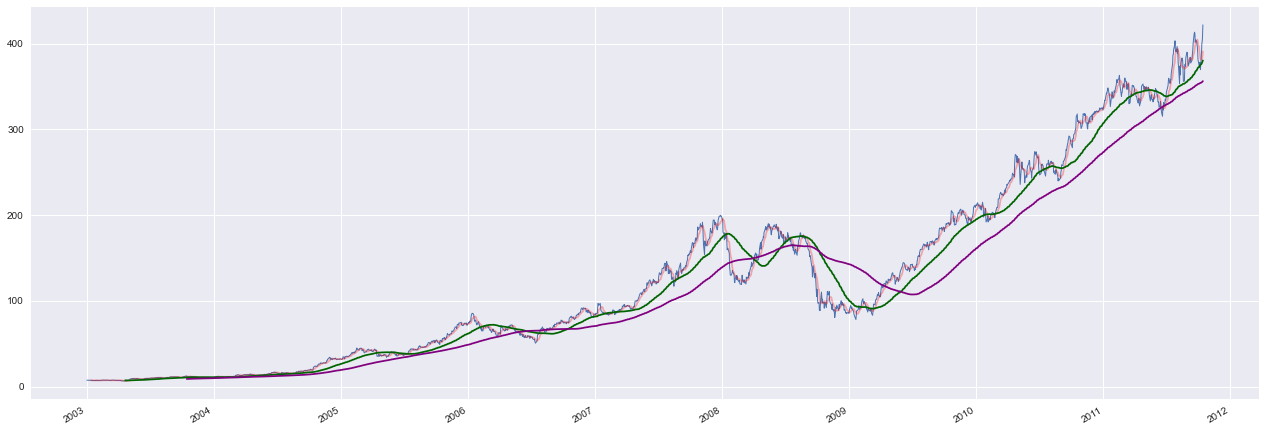

In [2]:
acoes = pd.read_csv('https://raw.githubusercontent.com/BrambleXu/pydata-notebook/master/examples/stock_px_2.csv',
                   parse_dates=True, index_col=0)
plt.style.use('seaborn')
# Calculando moving window mean para as ações da Apple
# Criando uma window de 250 linhas, com o período mínimo para cálculo de 1 linha
acoes.AAPL.plot(lw=1)
#acoes.AAPL.rolling(76, min_periods=5).mean().plot(figsize=(10,5), title='AAPL', color='r', alpha=0.2)
acoes.AAPL.rolling(9).mean().plot(color='r', figsize=(22,8), alpha=0.3)
acoes.AAPL.rolling(76).mean().plot(color='darkgreen')
acoes.AAPL.rolling(200).mean().plot(color='purple')

<AxesSubplot:>

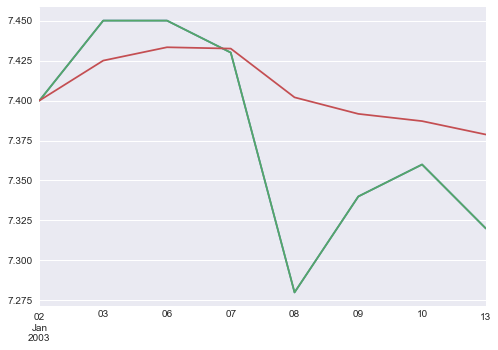

In [34]:
dois_dois = acoes.AAPL.iloc[:8,]
#display(dois_dois)
acoes.AAPL.iloc[:8,].plot()
dois_dois.rolling(len(dois_dois)-7).mean().plot()
dois_dois.expanding().mean().plot()

<AxesSubplot:>

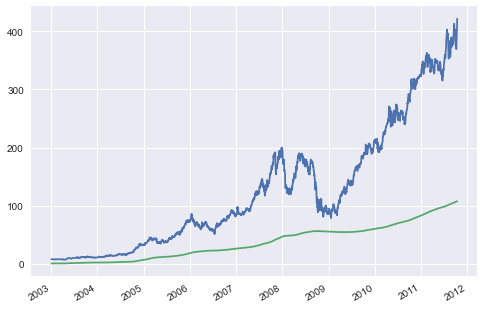

In [111]:
# Calculandouma expanding window mean
acoes.AAPL.plot()
acoes.AAPL.expanding().mean().plot()

<AxesSubplot:>

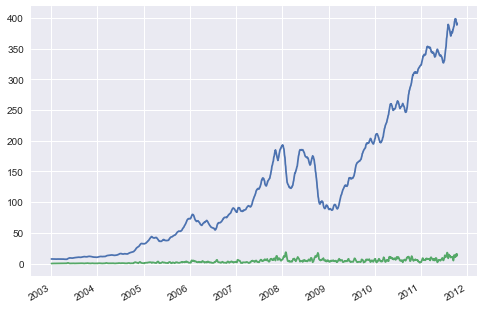

In [47]:
# Podemos também utlizar um time offset como parâmetro para rolling
apple = acoes.AAPL

# Plotando a média móvel de 20 períodos das ações da Apple
apple.rolling('20D').mean().plot()
apple.rolling('20D').std().plot()

* Exponentially Weighted Functions

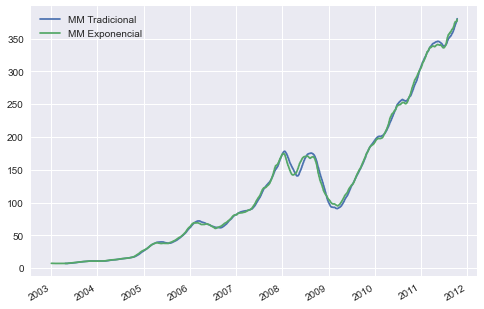

In [55]:
# Utilizando as médias móveis exponenciais
apple.rolling(76).mean().plot(label='MM Tradicional')
apple.ewm(span=76).mean().plot(label='MM Exponencial')
plt.legend()

In [58]:
pfizer = pd.read_csv('PFE.csv', index_col=0, usecols = ['Date', 'Adj Close'],parse_dates=True)
pfizer.rolling(76).mean()

,Adj Close
Date,
1972-06-01,NaN
1972-06-02,NaN
1972-06-05,NaN
1972-06-06,NaN
1972-06-07,NaN
...,...
2021-09-27,43.219967
2021-09-28,43.255825
2021-09-29,43.305040


In [71]:
a = pfizer.iloc[:10, :]
display(a)
a.rolling(4, min_periods=3).mean()

,Adj Close
Date,
1972-06-01,0.183906
1972-06-02,0.181677
1972-06-05,0.181120
1972-06-06,0.185021
1972-06-07,0.185021
1972-06-08,0.183906
1972-06-09,0.185021
1972-06-12,0.185578
1972-06-13,0.187250


,Adj Close
Date,
1972-06-01,NaN
1972-06-02,NaN
1972-06-05,0.182234
1972-06-06,0.182931
1972-06-07,0.183210
1972-06-08,0.183767
1972-06-09,0.184742
1972-06-12,0.184881
1972-06-13,0.185439


* Binary Moving Window Functions

<AxesSubplot:>

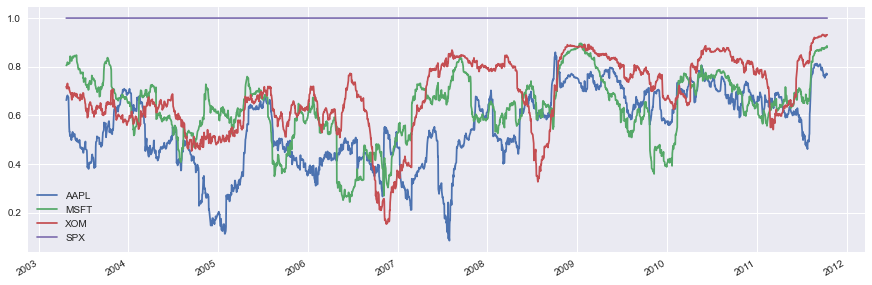

In [79]:
# Vamos utilizar funções binárias com o rolling
# Iremos calcular a correlação entre as ações das ações da bolsa e o índice SPX

apple = acoes.pct_change()
spx = acoes.SPX.pct_change()

apple.rolling(76).corr(spx).plot(figsize=(15,5))

/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


(0.0, 1.0)

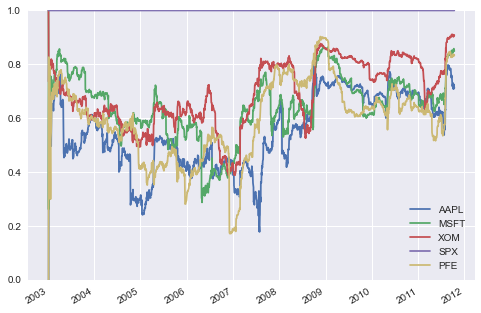

In [108]:
# Vamos mesclar o DF da Pfizer com o das demaais acoes
pfizer_novo = pfizer.loc['2003-01-02':,]
pfizer_novo.rename(columns={'Adj Close':'PFE'}, inplace=True)
novo_acoes = acoes.join(pfizer_novo)

novo_acoes.pct_change().ewm(76).corr(novo_acoes.SPX.pct_change()).plot()
ax = plt.gca()
ax.set_ylim([0,1])


In [112]:
from pathlib import Path
cap12 =  Path.cwd().parents[0] / 'Cap912 (Advanced Pandas)'
cap12.mkdir()